In [6]:
import os
from glob import glob

import numpy as np
from PIL import Image
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from fsc147_dataset import FSC147Dataset

In [3]:
dataset = FSC147Dataset(
    data_path='/share/DEEPLEARNING/datasets/FSC147/',
    captions='captions/FSC147_captions_blip2_train.npy',
    captions_sim='captions/FSC147_captions_blip2_train_sim_blip2.npy',
)

21.jpg


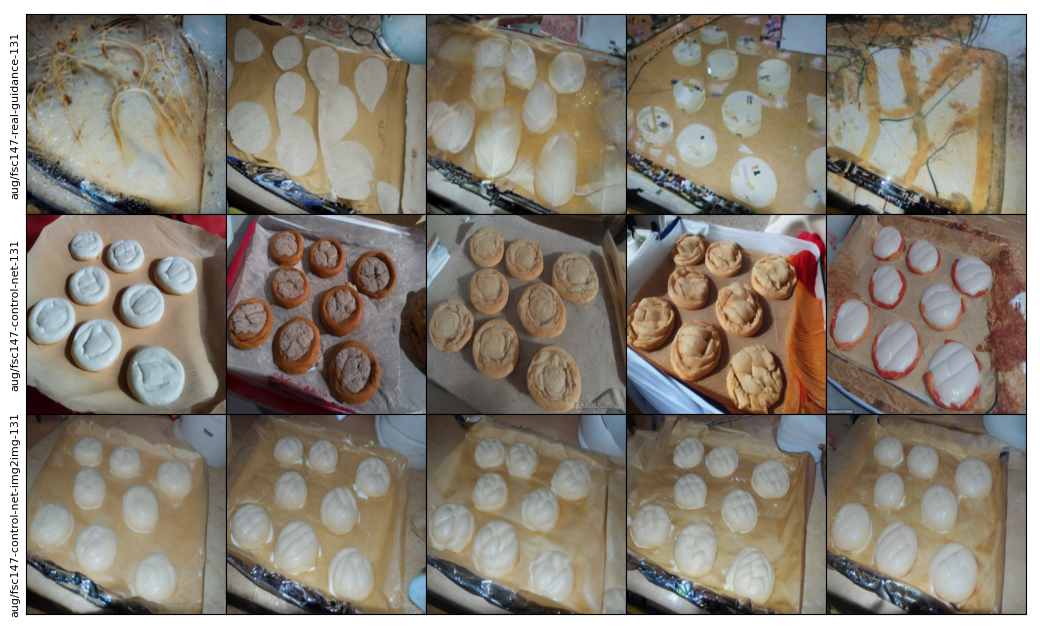

In [21]:
list_dirs = [
    'aug/fsc147-real-guidance-131',
    'aug/fsc147-control-net-131',
    'aug/fsc147-control-net-img2img-131'
]


show_density = False
num_synthetic = 5
n_rows = len(list_dirs)

fig, ax = plt.subplots(nrows=n_rows, ncols=num_synthetic, figsize=(10,10))
#idx = np.random.randint(0, len(dataset))
idx = 4
data = dataset.__getitem__(idx)
name = data['filename']
print(name)

for i, dir_ in enumerate(list_dirs):
    list_aug = glob(os.path.join(dir_, 'aug-{}-*.jpg'.format(name.split('.jpg')[0])))
    assert len(list_aug) >= num_synthetic
    for j in range(num_synthetic):
        filename = list_aug[j]
        img = np.asarray(Image.open(filename))
        if 'caption' in filename:
            ax[i,j].set_xlabel("\n".join(wrap(dataset.captions[filename.split('-')[-1]],20)), fontsize=12)
        ax[i,j].tick_params(top='off', bottom='off', left='off', right='off', labelleft='on')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        ax[i,j].imshow(cv2.resize(img, (512,512)))
        if show_density:
            ax[i,j].imshow(cv2.resize(data['density'], (512,512)), alpha=0.3)
           
            
    ax[i,0].set_ylabel(list_dirs[i], fontsize=8)
        
plt.subplots_adjust(hspace=0.0, wspace=0.0, left=0, bottom=0.0, right=1, top=1)
r, c = ax.shape
fig.set_figheight(fig.get_figwidth() * ax[0,0].get_data_ratio() * r / c )
#fig.tight_layout()
plt.show()